In [13]:
from typing import *
import matplotlib.pyplot as plt

In [14]:
class Segment:
    """Class to represent a memory segment."""


    def __init__(self, process_id: int, segment_name: str, base_address: int, size: int):
        self.process_id = process_id
        self.segment_name = segment_name
        self.base_address = base_address
        self.size = size


    def __repr__(self):
        return f"Segment(Process={self.process_id}, Name={self.segment_name}, Base Address={self.base_address}, Size={self.size})"

In [15]:
class PhysicalMemory:
    """Class to represent physical memory."""


    def __init__(self, total_size: int):
        self.total_size = total_size
        self.memory = [None] * total_size
        self.segments = []


    def allocate_segment(self, process_id: int, segment_name: str, size: int):
        """Allocate a segment in memory."""

        # Find a free block large enough
        free_start = None
        free_count = 0

        for i in range(self.total_size):
            if self.memory[i] is None:
                free_count += 1
                if free_start is None:
                    free_start = i

                if free_count == size:  # Found a suitable block
                    for j in range(free_start, free_start + size):
                        self.memory[j] = f"{process_id}:{segment_name}"

                    segment = Segment(process_id, segment_name, free_start, size)
                    self.segments.append(segment)
                    return segment
            else:
                free_start = None
                free_count = 0

        raise MemoryError(f"Not enough memory to allocate segment {segment_name} for process {process_id}.")


    def deallocate_segment(self, segment_name: str):
        """Deallocate a segment from memory."""

        segment = next((s for s in self.segments if s.segment_name == segment_name), None)
        if not segment:
            raise ValueError(f"Segment {segment_name} not found.")

        for i in range(segment.base_address, segment.base_address + segment.size):
            self.memory[i] = None

        self.segments.remove(segment)


    def display_memory(self):
        """Display the current state of memory."""

        print("Physical Memory State (PROCESS:SEGMENT):")
        print("\n".join(f'[{i}] {x}' if x else "." for i, x in enumerate(self.memory)))
        print("Allocated Segments:")
        for segment in self.segments:
            print(segment)
    
    def visualize_memory(self):
        """Visualize memory allocation using a bar chart."""
        
        plt.figure(figsize=(10, 2))
        colors = ["lightblue" if cell else "gray" for cell in self.memory]
        labels = [str(cell) if cell else "Free" for cell in self.memory]

        plt.bar(range(self.total_size), [1] * self.total_size, color=colors, edgecolor="black")
        plt.xticks(range(self.total_size), labels, fontsize=8, rotation=90)
        plt.title("Memory Allocation")
        plt.xlabel("Memory Address")
        plt.ylabel("Usage (1=Occupied, 0=Free)")
        plt.tight_layout()
        plt.show()

In [16]:
# Create physical memory with 50 units of size
physical_memory = PhysicalMemory(50)

# Allocate memory for processes
print("Allocating segments...")
try:
    physical_memory.allocate_segment(1, "Code", 10)
    physical_memory.allocate_segment(1, "Data", 5)
    physical_memory.allocate_segment(2, "Code", 8)
    physical_memory.allocate_segment(3, "Stack", 6)
except MemoryError as e:
    print(e)

Allocating segments...


In [17]:
# Display memory
physical_memory.display_memory()

Physical Memory State (PROCESS:SEGMENT):
[0] 1:Code
[1] 1:Code
[2] 1:Code
[3] 1:Code
[4] 1:Code
[5] 1:Code
[6] 1:Code
[7] 1:Code
[8] 1:Code
[9] 1:Code
[10] 1:Data
[11] 1:Data
[12] 1:Data
[13] 1:Data
[14] 1:Data
[15] 2:Code
[16] 2:Code
[17] 2:Code
[18] 2:Code
[19] 2:Code
[20] 2:Code
[21] 2:Code
[22] 2:Code
[23] 3:Stack
[24] 3:Stack
[25] 3:Stack
[26] 3:Stack
[27] 3:Stack
[28] 3:Stack
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Allocated Segments:
Segment(Process=1, Name=Code, Base Address=0, Size=10)
Segment(Process=1, Name=Data, Base Address=10, Size=5)
Segment(Process=2, Name=Code, Base Address=15, Size=8)
Segment(Process=3, Name=Stack, Base Address=23, Size=6)


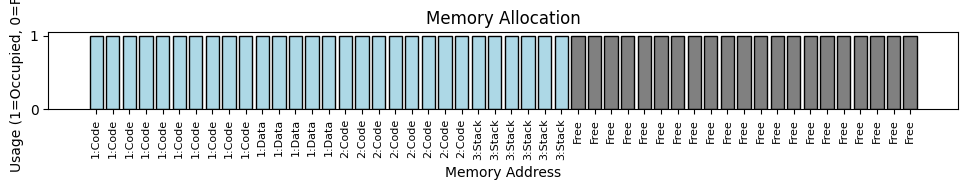

In [18]:
physical_memory.visualize_memory()

In [19]:
# Deallocate a segment
print("Deallocating segment 'Data' from Process 1...")
try:
    physical_memory.deallocate_segment("Data")
except ValueError as e:
    print(e)

Deallocating segment 'Data' from Process 1...


In [20]:
# Display memory
physical_memory.display_memory()

Physical Memory State (PROCESS:SEGMENT):
[0] 1:Code
[1] 1:Code
[2] 1:Code
[3] 1:Code
[4] 1:Code
[5] 1:Code
[6] 1:Code
[7] 1:Code
[8] 1:Code
[9] 1:Code
.
.
.
.
.
[15] 2:Code
[16] 2:Code
[17] 2:Code
[18] 2:Code
[19] 2:Code
[20] 2:Code
[21] 2:Code
[22] 2:Code
[23] 3:Stack
[24] 3:Stack
[25] 3:Stack
[26] 3:Stack
[27] 3:Stack
[28] 3:Stack
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Allocated Segments:
Segment(Process=1, Name=Code, Base Address=0, Size=10)
Segment(Process=2, Name=Code, Base Address=15, Size=8)
Segment(Process=3, Name=Stack, Base Address=23, Size=6)


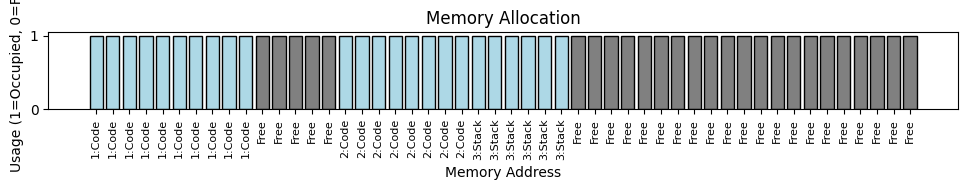

In [21]:
physical_memory.visualize_memory()

In [22]:
# Attempt to allocate a large segment
print("Attempting to allocate a large segment...")
try:
    physical_memory.allocate_segment(4, "LargeSegment", 25)
except MemoryError as e:
    print(e)

Attempting to allocate a large segment...
Not enough memory to allocate segment LargeSegment for process 4.


In [23]:
# Final memory state
physical_memory.display_memory()

Physical Memory State (PROCESS:SEGMENT):
[0] 1:Code
[1] 1:Code
[2] 1:Code
[3] 1:Code
[4] 1:Code
[5] 1:Code
[6] 1:Code
[7] 1:Code
[8] 1:Code
[9] 1:Code
.
.
.
.
.
[15] 2:Code
[16] 2:Code
[17] 2:Code
[18] 2:Code
[19] 2:Code
[20] 2:Code
[21] 2:Code
[22] 2:Code
[23] 3:Stack
[24] 3:Stack
[25] 3:Stack
[26] 3:Stack
[27] 3:Stack
[28] 3:Stack
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Allocated Segments:
Segment(Process=1, Name=Code, Base Address=0, Size=10)
Segment(Process=2, Name=Code, Base Address=15, Size=8)
Segment(Process=3, Name=Stack, Base Address=23, Size=6)


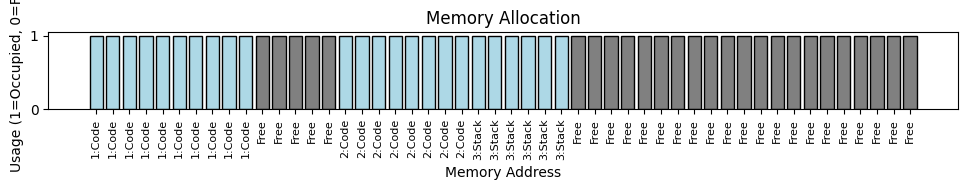

In [24]:
physical_memory.visualize_memory()

In [25]:
# Allocate memory for processes
print("Allocating segments...")
try:
    physical_memory.allocate_segment(1, "Data", 3)
except MemoryError as e:
    print(e)

Allocating segments...


In [26]:
# Final memory state
physical_memory.display_memory()

Physical Memory State (PROCESS:SEGMENT):
[0] 1:Code
[1] 1:Code
[2] 1:Code
[3] 1:Code
[4] 1:Code
[5] 1:Code
[6] 1:Code
[7] 1:Code
[8] 1:Code
[9] 1:Code
[10] 1:Data
[11] 1:Data
[12] 1:Data
.
.
[15] 2:Code
[16] 2:Code
[17] 2:Code
[18] 2:Code
[19] 2:Code
[20] 2:Code
[21] 2:Code
[22] 2:Code
[23] 3:Stack
[24] 3:Stack
[25] 3:Stack
[26] 3:Stack
[27] 3:Stack
[28] 3:Stack
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Allocated Segments:
Segment(Process=1, Name=Code, Base Address=0, Size=10)
Segment(Process=2, Name=Code, Base Address=15, Size=8)
Segment(Process=3, Name=Stack, Base Address=23, Size=6)
Segment(Process=1, Name=Data, Base Address=10, Size=3)


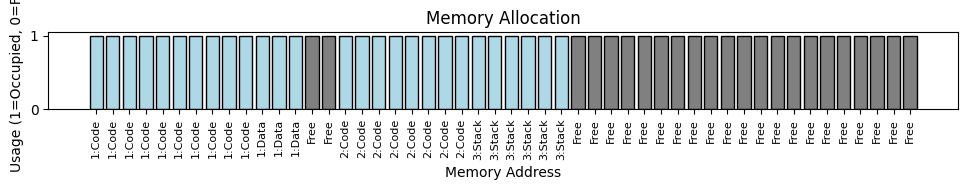

In [27]:
physical_memory.visualize_memory()